# Payment Date Prediction


### Importing related Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

### Store the dataset into the Dataframe


In [ ]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)

### Check the shape of the dataframe


In [ ]:
df.shape

(50000, 20)

### Check the Detail information of the dataframe

In [ ]:
df.info

<bound method DataFrame.info of        Unnamed: 0 business_code cust_number       name_customer  \
0               0          U001  0200769623        WAL-MAR corp   
1               1          U001  0200980828              BEN E    
2               2          U001  0200792734          MDV/ trust   
3               3          CA02  0140105686            SYSC llc   
4               4          U001  0200769623  WAL-MAR foundation   
...           ...           ...         ...                 ...   
49995       49995          U001  0200561861      CO corporation   
49996       49996          U001  0200769623          WAL-MAR co   
49997       49997          U001  0200772595    SAFEW associates   
49998       49998          U001  0200726979           BJ'S  llc   
49999       49999          U001  0200020431            DEC corp   

                clear_date  buisness_year        doc_id posting_date  \
0      2020-02-11 00:00:00         2020.0  1.930438e+09   2020-01-26   
1      2019-08-08 0

### Display All the column names

In [ ]:
df.columns

Index(['Unnamed: 0', 'business_code', 'cust_number', 'name_customer',
       'clear_date', 'buisness_year', 'doc_id', 'posting_date',
       'document_create_date', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'document type', 'posting_id', 'area_business',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [ ]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0 business_code cust_number       name_customer  \
0               0          U001  0200769623        WAL-MAR corp   
1               1          U001  0200980828              BEN E    
2               2          U001  0200792734          MDV/ trust   
3               3          CA02  0140105686            SYSC llc   
4               4          U001  0200769623  WAL-MAR foundation   
...           ...           ...         ...                 ...   
49995       49995          U001  0200561861      CO corporation   
49996       49996          U001  0200769623          WAL-MAR co   
49997       49997          U001  0200772595    SAFEW associates   
49998       49998          U001  0200726979           BJ'S  llc   
49999       49999          U001  0200020431            DEC corp   

                clear_date  buisness_year        doc_id posting_date  \
0      2020-02-11 00:00:00         2020.0  1.930438e+09   2020-01-26   
1      2019-08-08

# Data Cleaning

- Show top 5 records from the dataset

In [ ]:
df.head(5)

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [ ]:
df.isna().mean().round(5)*100

Unnamed: 0                  0.000
business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [ ]:
print('invoice_id')
print((df['invoice_id']))

invoice_id
0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: invoice_id, Length: 50000, dtype: float64


In [ ]:
print('doc_id')
print((df['doc_id']))

doc_id
0        1.930438e+09
1        1.929646e+09
2        1.929874e+09
3        2.960623e+09
4        1.930148e+09
             ...     
49995    1.930797e+09
49996    1.929744e+09
49997    1.930537e+09
49998    1.930199e+09
49999    1.928576e+09
Name: doc_id, Length: 50000, dtype: float64


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [ ]:
comparison1 = np.where(df["baseline_create_date"] == df["document_create_date"], True, False)
(unique, counts) = np.unique(comparison1, return_counts=True)
freq = np.asarray((unique, counts)).T
print("Comparison Between 'baseline_create_date' and 'document_create_date'")
print(freq)

comparison2 = np.where(df["document_create_date"] == df["document_create_date.1"], True, False)
(unique, counts) = np.unique(comparison2, return_counts=True)
freq = np.asarray((unique, counts)).T
print("Comparison Between 'document_create_date' and 'document_create_date.1'")
print(freq)

Comparison Between 'baseline_create_date' and 'document_create_date'
[[    0 34037]
 [    1 15963]]
Comparison Between 'document_create_date' and 'document_create_date.1'
[[    0 28768]
 [    1 21232]]


#### Please check, Column 'posting_id' is constant columns or not


In [ ]:
df.posting_id.describe()

count    50000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: posting_id, dtype: float64

In [ ]:
#standard deviation is 0

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [ ]:
df.isOpen.describe()

count    50000.000000
mean         0.200000
std          0.400004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isOpen, dtype: float64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type'
- 'document_create_date.1

In [ ]:
df.shape

(50000, 20)

In [ ]:
df1 = df.drop(columns=['area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1'])
df1.shape

(50000, 13)

### Please check from the dataframe whether all the columns are removed or not

In [ ]:
df1.columns

Index(['Unnamed: 0', 'business_code', 'cust_number', 'name_customer',
       'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [ ]:
duplicate = df1[df1.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms


### Display the Number of Duplicate Rows

In [ ]:
duplicate.count()

Unnamed: 0              0
business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
dtype: int64

### Drop all the Duplicate Rows

In [ ]:
df1 = df1.drop_duplicates()
df1

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [ ]:
duplicate1 = df1[df1.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate1.count()

Duplicate Rows :


Unnamed: 0              0
business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
dtype: int64

### Check for the number of Rows and Columns in your dataset

In [ ]:
rows = len(df1.axes[0])
cols = len(df1.axes[1])
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 50000
Number of Columns: 13


### Find out the total count of null values in each columns

In [ ]:
df1.isna().sum()

Unnamed: 0                  0
business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
dtype: int64

#Data type Conversion

### Please check the data type of each column of the dataframe

In [ ]:
df1.dtypes

Unnamed: 0                int64
business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date
- baseline_create_date

In [ ]:
df1[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [ ]:
df1

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [ ]:
df1['baseline_create_date']=pd.to_datetime(df1['baseline_create_date'], format = "%Y%m%d").dt.strftime('%Y%m%d')
df1['posting_date']=pd.to_datetime(df1['posting_date'], format = "%Y-%m-%d").dt.strftime('%Y%m%d')
df1['due_in_date']=pd.to_datetime(df1['due_in_date'], format = "%Y%m%d").dt.strftime('%Y%m%d')
df1['clear_date']=pd.to_datetime(df1['clear_date'], format = "%Y-%m-%d").dt.strftime('%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [ ]:
df1[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date             object
baseline_create_date    object
dtype: object

In [ ]:
df1

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,0,U001,0200769623,WAL-MAR corp,20200211,2020.0,1.930438e+09,20200126,20200210,USD,54273.28,20200126,NAH4
1,1,U001,0200980828,BEN E,20190808,2019.0,1.929646e+09,20190722,20190811,USD,79656.60,20190722,NAD1
2,2,U001,0200792734,MDV/ trust,20191230,2019.0,1.929874e+09,20190914,20190929,USD,2253.86,20190914,NAA8
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,CAD,3299.70,20200331,CA10
4,4,U001,0200769623,WAL-MAR foundation,20191125,2019.0,1.930148e+09,20191113,20191128,USD,33133.29,20191113,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,20200421,20200506,USD,3187.86,20200421,NAA8
49996,49996,U001,0200769623,WAL-MAR co,20190903,2019.0,1.929744e+09,20190815,20190830,USD,6766.54,20190815,NAH4
49997,49997,U001,0200772595,SAFEW associates,20200305,2020.0,1.930537e+09,20200219,20200305,USD,6120.86,20200219,NAA8
49998,49998,U001,0200726979,BJ'S llc,20191212,2019.0,1.930199e+09,20191127,20191212,USD,63.48,20191127,NAA8


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency

In [ ]:
print(dict(df1['invoice_currency'].value_counts()))

{'USD': 46081, 'CAD': 3919}


#### display the "total_open_amount" column value

In [ ]:
print((df1['total_open_amount']))

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 50000, dtype: float64


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and converted CAD to USD

In [ ]:
df1['converted_usd'] = ''

In [ ]:
df1['converted_usd'] = np.where((df1['invoice_currency'] == "CAD"), df1['total_open_amount']*0.7, df1['total_open_amount'])

### Display the new "converted_usd" column values

In [ ]:
print((df1['converted_usd']))

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 50000, dtype: float64


### Display year wise total number of record

- Note -  use "buisness_year" column for this

In [ ]:
df1.groupby('buisness_year').size()

buisness_year
2019.0    34715
2020.0    15285
dtype: int64

### Write the code to delete the following columns

- 'invoice_currency'
- 'total_open_amount',

In [ ]:
df1.drop('invoice_currency', inplace=True, axis=1)
df1.drop('total_open_amount', inplace=True, axis=1)
df1

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,0,U001,0200769623,WAL-MAR corp,20200211,2020.0,1.930438e+09,20200126,20200210,20200126,NAH4,54273.28
1,1,U001,0200980828,BEN E,20190808,2019.0,1.929646e+09,20190722,20190811,20190722,NAD1,79656.60
2,2,U001,0200792734,MDV/ trust,20191230,2019.0,1.929874e+09,20190914,20190929,20190914,NAA8,2253.86
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79
4,4,U001,0200769623,WAL-MAR foundation,20191125,2019.0,1.930148e+09,20191113,20191128,20191113,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,20200421,20200506,20200421,NAA8,3187.86
49996,49996,U001,0200769623,WAL-MAR co,20190903,2019.0,1.929744e+09,20190815,20190830,20190815,NAH4,6766.54
49997,49997,U001,0200772595,SAFEW associates,20200305,2020.0,1.930537e+09,20200219,20200305,20200219,NAA8,6120.86
49998,49998,U001,0200726979,BJ'S llc,20191212,2019.0,1.930199e+09,20191127,20191212,20191127,NAA8,63.48


### Write a code to check the number of columns in dataframe

In [ ]:
len(df1.columns)

12

# Splitting the Dataset

### Look for all columns containing null value

- Note - Output expected is only one column

In [ ]:
df1.isna().any()[lambda x: x]

clear_date    True
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [ ]:
df1['clear_date'].isnull().sum()

10000

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset )
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset )

In [ ]:
maindata = df1[df1['clear_date'].notnull()]
maindata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,0,U001,0200769623,WAL-MAR corp,20200211,2020.0,1.930438e+09,20200126,20200210,20200126,NAH4,54273.280
1,1,U001,0200980828,BEN E,20190808,2019.0,1.929646e+09,20190722,20190811,20190722,NAD1,79656.600
2,2,U001,0200792734,MDV/ trust,20191230,2019.0,1.929874e+09,20190914,20190929,20190914,NAA8,2253.860
4,4,U001,0200769623,WAL-MAR foundation,20191125,2019.0,1.930148e+09,20191113,20191128,20191113,NAH4,33133.290
5,5,CA02,0140106181,THE corporation,20191204,2019.0,2.960581e+09,20190920,20191004,20190924,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,U001,0200762301,C&S WH trust,20190725,2019.0,1.929601e+09,20190710,20190725,20190710,NAC6,84780.400
49996,49996,U001,0200769623,WAL-MAR co,20190903,2019.0,1.929744e+09,20190815,20190830,20190815,NAH4,6766.540
49997,49997,U001,0200772595,SAFEW associates,20200305,2020.0,1.930537e+09,20200219,20200305,20200219,NAA8,6120.860
49998,49998,U001,0200726979,BJ'S llc,20191212,2019.0,1.930199e+09,20191127,20191212,20191127,NAA8,63.480


In [ ]:
nulldata = df1[df1['clear_date'].isnull()]
nulldata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79
7,7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02
10,10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59
14,14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65
15,15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...
49975,49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,20200310,20200325,20200310,NAH4,13114.99
49980,49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,20200503,20200518,20200503,NAH4,8899.71
49982,49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,20200311,20200326,20200311,NAA8,4967.06
49992,49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,20200325,20200409,20200325,NAA8,1998.64


### Check the number of Rows and Columns for both the dataframes

In [ ]:
rows = len(maindata.axes[0])
cols = len(maindata.axes[1])
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 40000
Number of Columns: 12


In [ ]:
rows = len(nulldata.axes[0])
cols = len(nulldata.axes[1])
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 10000
Number of Columns: 12


### Display the 5 records from maindata and nulldata dataframes

In [ ]:
maindata.head(5)

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,0,U001,0200769623,WAL-MAR corp,20200211,2020.0,1.930438e+09,20200126,20200210,20200126,NAH4,54273.280
1,1,U001,0200980828,BEN E,20190808,2019.0,1.929646e+09,20190722,20190811,20190722,NAD1,79656.600
2,2,U001,0200792734,MDV/ trust,20191230,2019.0,1.929874e+09,20190914,20190929,20190914,NAA8,2253.860
4,4,U001,0200769623,WAL-MAR foundation,20191125,2019.0,1.930148e+09,20191113,20191128,20191113,NAH4,33133.290
5,5,CA02,0140106181,THE corporation,20191204,2019.0,2.960581e+09,20190920,20191004,20190924,CA10,15558.088


In [ ]:
nulldata.head(5)

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79
7,7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02
10,10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59
14,14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65
15,15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date"
- Formula - Delay = clear_date - due_in_date

In [ ]:
maindata['clear_date']=pd.to_datetime(maindata['clear_date'],format='%Y-%m-%d').dt.date
maindata['posting_date']=pd.to_datetime(maindata['posting_date'],format='%Y-%m-%d').dt.date
maindata['due_in_date']=pd.to_datetime(maindata['due_in_date'],format='%Y-%m-%d').dt.date
maindata['baseline_create_date']=pd.to_datetime(maindata['baseline_create_date'],format='%Y-%m-%d').dt.date

<ipython-input-47-206b2bd47915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['clear_date']=pd.to_datetime(maindata['clear_date'],format='%Y-%m-%d').dt.date
<ipython-input-47-206b2bd47915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['posting_date']=pd.to_datetime(maindata['posting_date'],format='%Y-%m-%d').dt.date
<ipython-input-47-206b2bd47915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
maindata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


In [ ]:
maindata['delay']=(maindata['clear_date']-maindata['due_in_date'])

<ipython-input-49-befafb8c81b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['delay']=(maindata['clear_date']-maindata['due_in_date'])


In [ ]:
print((maindata['delay']))

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: delay, Length: 40000, dtype: timedelta64[ns]


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [ ]:
map_cust_num=maindata.groupby("name_customer")['delay'].mean(numeric_only = False).to_dict()
maindata['avg_delay']=maindata['name_customer'].map(map_cust_num)

<ipython-input-51-ec8c9cfb7a74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['name_customer'].map(map_cust_num)


In [ ]:
print((maindata['avg_delay']))

0       -3 days +07:06:07.346938776
1                  19 days 00:00:00
2                   7 days 06:00:00
4       -3 days +19:12:20.305522915
5        70 days 02:10:54.545454545
                    ...            
49994   -1 days +15:20:24.742268042
49996   -3 days +12:18:25.116279070
49997     1 days 01:08:34.285714285
49998     1 days 13:02:36.521739130
49999   -4 days +01:01:56.129032259
Name: avg_delay, Length: 40000, dtype: timedelta64[ns]


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [ ]:
maindata['avg_delay']=maindata['name_customer'].map(map_cust_num)

<ipython-input-53-0331b6444f51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['name_customer'].map(map_cust_num)


In [ ]:
maindata.columns

Index(['Unnamed: 0', 'business_code', 'cust_number', 'name_customer',
       'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd', 'delay',
       'avg_delay'],
      dtype='object')

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [ ]:
maindata['avg_delay'] = maindata['avg_delay'].apply(lambda e: pd.Timedelta(e).view(np.int64) / 1e9)

<ipython-input-55-ba351a47b641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay'] = maindata['avg_delay'].apply(lambda e: pd.Timedelta(e).view(np.int64) / 1e9)


### Display the maindata dataframe

In [ ]:
maindata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.336327e+05
1,1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.264000e+05
4,4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.900597e+05
5,5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.055855e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.117526e+04
49996,49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.148949e+05
49997,49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.333565e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe

In [ ]:
maindata.drop('delay', inplace=True, axis=1)
maindata.drop('clear_date', inplace=True, axis=1)
maindata

<ipython-input-57-adb6c4124619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata.drop('delay', inplace=True, axis=1)
<ipython-input-57-adb6c4124619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata.drop('clear_date', inplace=True, axis=1)


,Unnamed: 0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.336327e+05
1,1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.264000e+05
4,4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.900597e+05
5,5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.055855e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,-3.117526e+04
49996,49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-2.148949e+05
49997,49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,9.051429e+04
49998,49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,1.333565e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [ ]:
maindata.columns

Index(['Unnamed: 0', 'business_code', 'cust_number', 'name_customer',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'avg_delay'],
      dtype='object')

In [ ]:
select = maindata[['avg_delay']]
y = select.copy()
y

,avg_delay
0,-2.336327e+05
1,1.641600e+06
2,6.264000e+05
4,-1.900597e+05
5,6.055855e+06
...,...
49994,-3.117526e+04
49996,-2.148949e+05
49997,9.051429e+04
49998,1.333565e+05


In [ ]:
select = maindata[['business_code', 'cust_number', 'name_customer', 'buisness_year',
           'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
           'cust_payment_terms', 'converted_usd']]
X = select.copy()
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


#### You are expected to split both the dataframes into train and test format in 60:40 ratio

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format

In [ ]:
X_train = X.sample(frac=0.6)
X_loc_test = X.drop(X_train.index)

y_train = y.sample(frac=0.6)
y_loc_test = y.drop(y_train.index)

In [ ]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
41027,U001,0200353024,DECA us,2020.0,1.930372e+09,2020-01-08,2020-01-24,2020-01-01,NAM4,129.600
37316,U001,0200793088,DEMOU llc,2019.0,1.929939e+09,2019-09-30,2019-10-15,2019-09-30,NAA8,17854.080
45118,U001,0200803720,DEC,2019.0,1.929471e+09,2019-06-11,2019-06-08,2019-06-01,NAM1,12475.000
20671,U001,0200726979,BJ'S in,2019.0,1.928653e+09,2019-01-20,2019-02-04,2019-01-20,NAA8,133.760
43625,U001,0200783734,FAREW corporation,2019.0,1.928925e+09,2019-03-07,2019-03-22,2019-03-07,NAA8,42032.520
...,...,...,...,...,...,...,...,...,...,...
24840,U001,0200705742,DOT foundation,2019.0,1.930021e+09,2019-10-19,2019-11-03,2019-10-19,NAA8,36325.260
9236,U001,200418007,AM trust,2019.0,1.929063e+09,2019-04-04,2019-04-19,2019-04-04,NAA8,8221.440
5242,U001,0200769623,WAL-MAR in,2019.0,1.929287e+09,2019-05-09,2019-05-24,2019-05-09,NAH4,319.990
30831,CA02,0140104440,SO us,2019.0,2.960537e+09,2019-03-24,2019-04-04,2019-03-25,CA10,130220.447


In [ ]:
X_loc_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
11,U001,0200743129,BROOKS co,2019.0,1.928551e+09,2019-01-02,2019-01-17,2019-01-02,NAA8,103147.37
13,U001,0200721222,GO corporation,2019.0,1.930022e+09,2019-10-17,2019-11-01,2019-10-17,NAA8,19581.57
19,U001,0200769623,WAL-MAR systems,2020.0,1.930438e+09,2020-01-24,2020-02-08,2020-01-24,NAH4,53349.54
...,...,...,...,...,...,...,...,...,...,...
49985,U001,0200769623,WAL-MAR in,2019.0,1.929242e+09,2019-05-02,2019-05-17,2019-05-02,NAH4,542.11
49993,U001,0200726979,BJ'S,2020.0,1.930378e+09,2020-01-08,2020-01-23,2020-01-08,NAA8,31.62
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.40
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54


In [ ]:
y_train

,avg_delay
46842,-1.746159e+05
34781,-1.900597e+05
39142,-2.505600e+06
527,1.728000e+05
34642,7.664516e+04
...,...
46484,-2.336327e+05
38406,-1.728000e+04
3372,-2.802977e+05
34882,4.762205e+03


In [ ]:
y_loc_test

,avg_delay
0,-233632.653061
2,626400.000000
4,-190059.694477
17,43200.000000
24,-214894.883721
...,...
49991,43200.000000
49993,101082.352941
49994,-31175.257732
49996,-214894.883721


### Please check for the number of rows and columns of all the new dataframes (all 4)

In [ ]:
print(X_train.shape, X_loc_test.shape,y_train.shape,y_loc_test.shape)

(24000, 10) (16000, 10) (24000, 1) (16000, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [ ]:
X_val = X_loc_test.sample(frac = 0.5)
X_test = X_loc_test.drop(X_val.index)

y_val = y_loc_test.sample(frac = 0.5)
y_test = y_loc_test.drop(y_val.index)

### Please check for the number of rows and columns of all the 4 dataframes

In [ ]:
print(X_val.shape, X_test.shape,y_val.shape,y_test.shape)

(8000, 10) (8000, 10) (8000, 1) (8000, 1)


### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable

<ipython-input-69-85c4b94ff872>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='avg_delay', ylabel='Count');


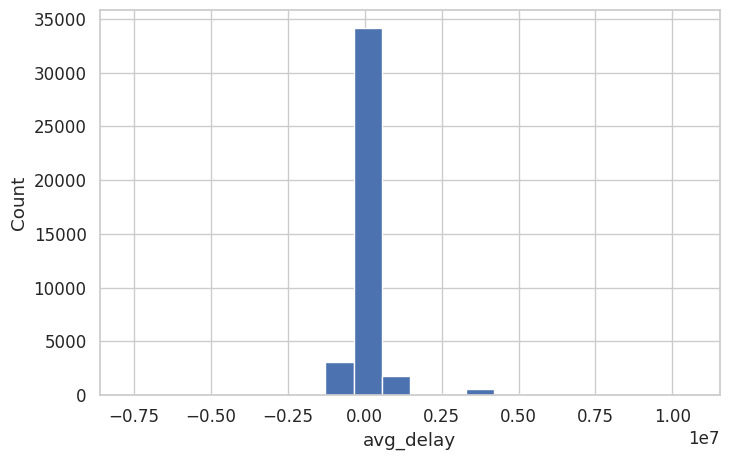

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(y, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='avg_delay', ylabel='Count');


### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [ ]:
df3 = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

<Axes: >

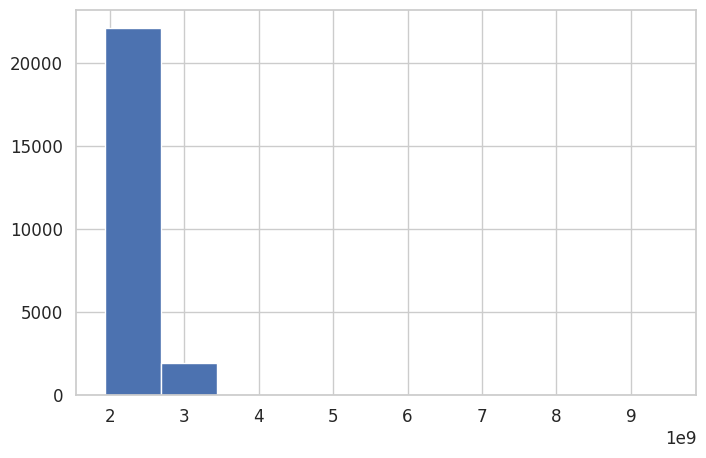

In [ ]:
X_train['doc_id'].hist()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<Axes: >

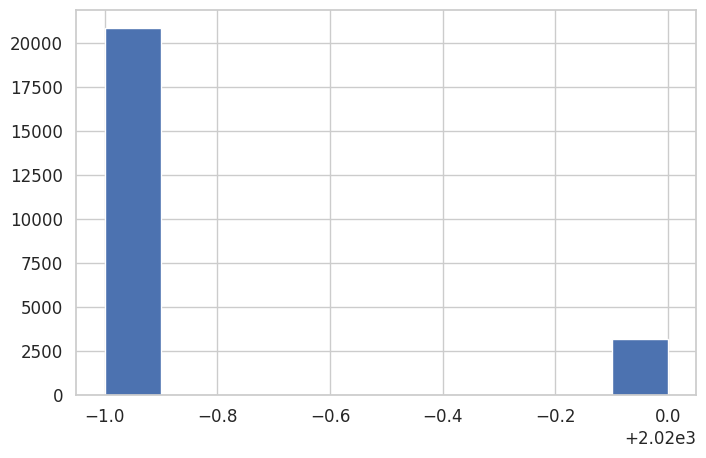

In [ ]:
X_train.buisness_year.hist()

<ipython-input-73-ea0172036a8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['buisness_year'], kde=False, hist_kws={"alpha": 1}).set(xlabel='buisness_year', ylabel='Count');


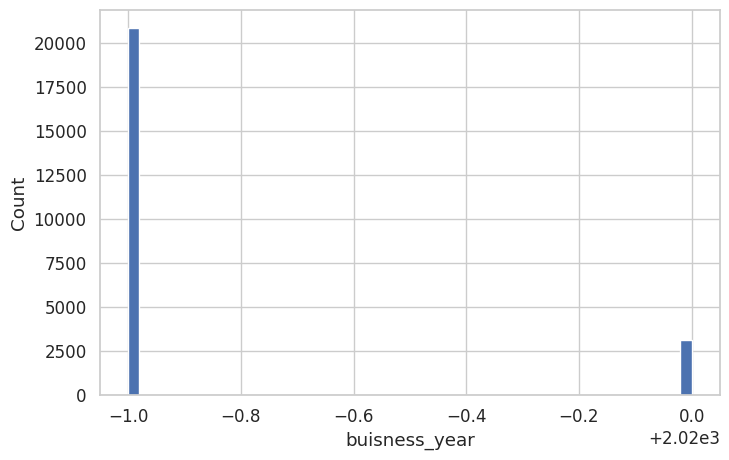

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(X_train['buisness_year'], kde=False, hist_kws={"alpha": 1}).set(xlabel='buisness_year', ylabel='Count');

# Feature Engineering

### Display and describe the X_train dataframe

In [ ]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
41027,U001,0200353024,DECA us,2020.0,1.930372e+09,2020-01-08,2020-01-24,2020-01-01,NAM4,129.600
37316,U001,0200793088,DEMOU llc,2019.0,1.929939e+09,2019-09-30,2019-10-15,2019-09-30,NAA8,17854.080
45118,U001,0200803720,DEC,2019.0,1.929471e+09,2019-06-11,2019-06-08,2019-06-01,NAM1,12475.000
20671,U001,0200726979,BJ'S in,2019.0,1.928653e+09,2019-01-20,2019-02-04,2019-01-20,NAA8,133.760
43625,U001,0200783734,FAREW corporation,2019.0,1.928925e+09,2019-03-07,2019-03-22,2019-03-07,NAA8,42032.520
...,...,...,...,...,...,...,...,...,...,...
24840,U001,0200705742,DOT foundation,2019.0,1.930021e+09,2019-10-19,2019-11-03,2019-10-19,NAA8,36325.260
9236,U001,200418007,AM trust,2019.0,1.929063e+09,2019-04-04,2019-04-19,2019-04-04,NAA8,8221.440
5242,U001,0200769623,WAL-MAR in,2019.0,1.929287e+09,2019-05-09,2019-05-24,2019-05-09,NAH4,319.990
30831,CA02,0140104440,SO us,2019.0,2.960537e+09,2019-03-24,2019-04-04,2019-03-25,CA10,130220.447


In [ ]:
X_train.describe

<bound method NDFrame.describe of       business_code cust_number      name_customer  buisness_year  \
41027          U001  0200353024            DECA us         2020.0   
37316          U001  0200793088          DEMOU llc         2019.0   
45118          U001  0200803720               DEC          2019.0   
20671          U001  0200726979           BJ'S  in         2019.0   
43625          U001  0200783734  FAREW corporation         2019.0   
...             ...         ...                ...            ...   
24840          U001  0200705742     DOT foundation         2019.0   
9236           U001   200418007           AM trust         2019.0   
5242           U001  0200769623         WAL-MAR in         2019.0   
30831          CA02  0140104440              SO us         2019.0   
39864          U001  0200799367     MCL foundation         2019.0   

             doc_id posting_date due_in_date baseline_create_date  \
41027  1.930372e+09   2020-01-08  2020-01-24           2020-01-01   

#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [ ]:
X_train['business_code'].unique()

array(['U001', 'CA02', 'U002', 'U013', 'U007', 'U005'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks

In [ ]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [ ]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe

In [ ]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
41027,U001,1
37316,U001,1
45118,U001,1
20671,U001,1
43625,U001,1
...,...,...
24840,U001,1
9236,U001,1
5242,U001,1
30831,CA02,0


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [ ]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code

In [ ]:
X_train , X_test , X_val = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here



In [ ]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [ ]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [ ]:
X_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

In [ ]:
X_train['posting_date'] =  pd.to_datetime(X_train['posting_date'], format='%Y-%m-%d')
X_train['due_in_date'] =  pd.to_datetime(X_train['due_in_date'], format='%Y-%m-%d')
X_train['baseline_create_date'] =  pd.to_datetime(X_train['baseline_create_date'], format='%Y-%m-%d')

In [ ]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

In [ ]:
X_test['posting_date'] =  pd.to_datetime(X_test['posting_date'], format='%Y-%m-%d')
X_test['due_in_date'] =  pd.to_datetime(X_test['due_in_date'], format='%Y-%m-%d')
X_test['baseline_create_date'] =  pd.to_datetime(X_test['baseline_create_date'], format='%Y-%m-%d')

In [ ]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_val.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
posting_date               object
due_in_date                object
baseline_create_date       object
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
dtype: object

In [ ]:
X_val['posting_date'] =  pd.to_datetime(X_val['posting_date'], format='%Y-%m-%d')
X_val['due_in_date'] =  pd.to_datetime(X_val['due_in_date'], format='%Y-%m-%d')
X_val['baseline_create_date'] =  pd.to_datetime(X_val['baseline_create_date'], format='%Y-%m-%d')

In [ ]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year






In [ ]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year


X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [ ]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year


X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [ ]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year


X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format


In [ ]:
X_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [ ]:
X_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [ ]:
X_val.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function
- Note - Keep the code as it is, no need to change

In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change


In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change


In [ ]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change

In [ ]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [ ]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'month_of_createdate',
 'year_of_createdate',
 'day_of_createdate',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<Axes: title={'center': 'Pearson Correlation of Features'}>

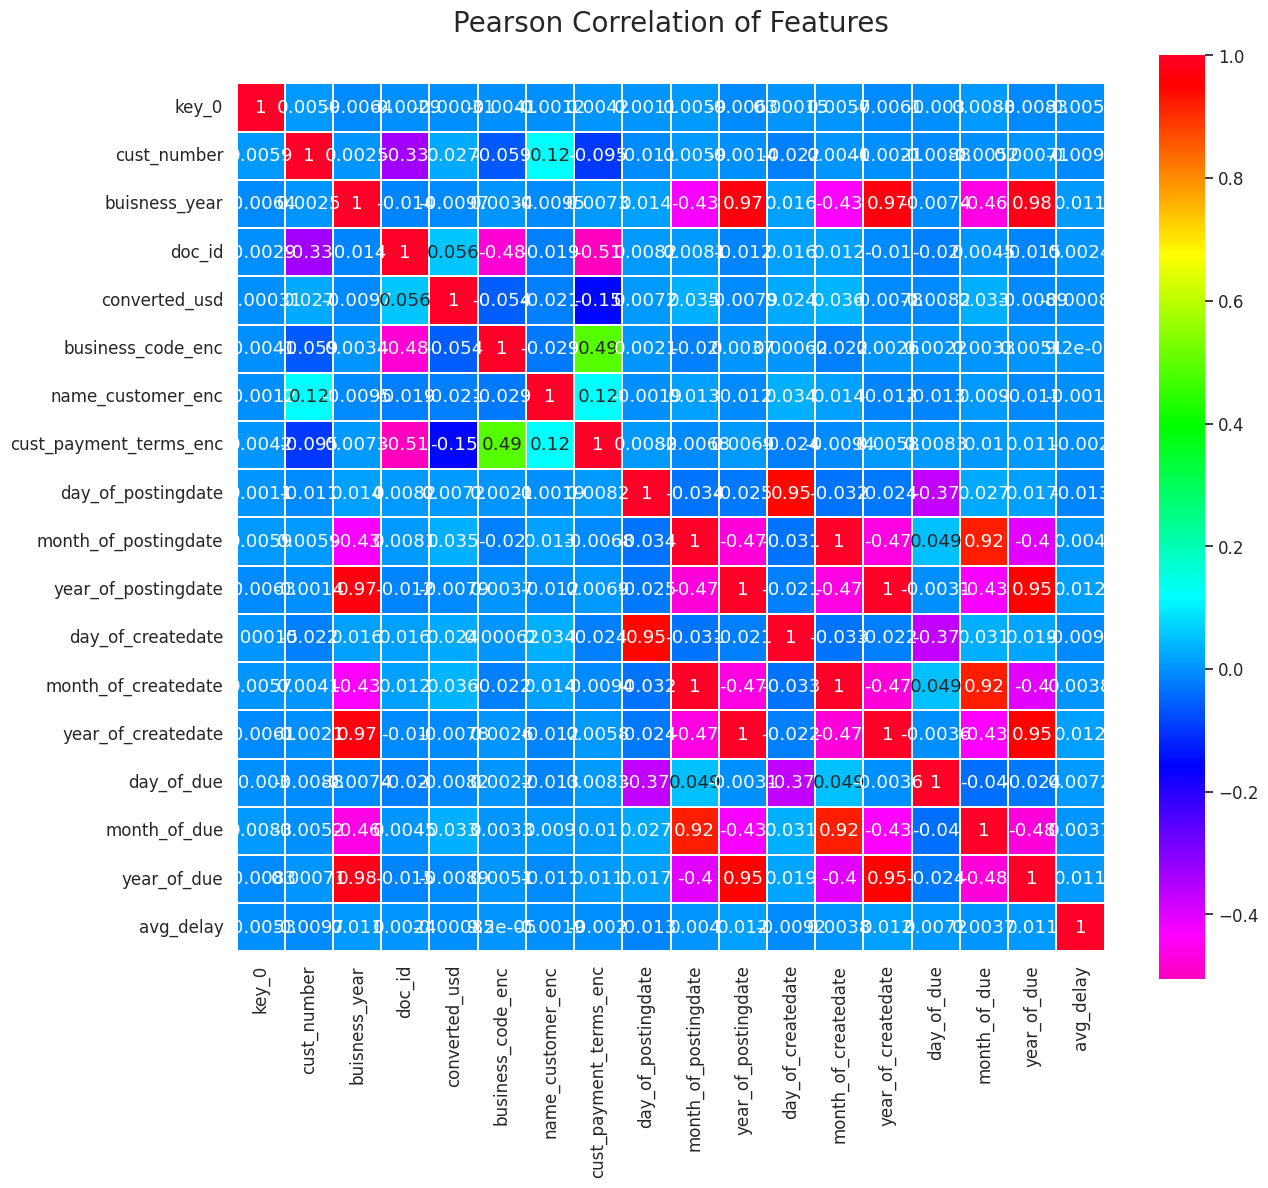

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([1.82109885e+15, 1.13869748e-01, 8.43807191e+16, 1.29632990e+09,
       3.05483290e-01, 1.11512456e+06, 1.29866495e+02, 7.62313540e+01,
       1.22313217e+01, 1.14048568e-01, 7.77524710e+01, 1.22437465e+01,
       1.14174165e-01, 7.64711649e+01, 1.20553625e+01, 1.17237832e-01])

### Features columns are
- 'year_of_createdate'
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression

### You need to make different blank list for different evaluation matrix

- MSE
- R2
- Algorithm

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

622304.8633033393

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[433318349315.27814],[-0.000908913897515129],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Check for the

- Mean Square Error
- R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

624722.2307593147

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SupportVectorRegression'],[433318349315.27814, 435490624122.3992],[-0.000908913897515129, -0.005926585596205403],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

979263.5668600064

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression'],[433318349315.27814, 435490624122.3992, 1049823270153.1295],[-0.000908913897515129, -0.005926585596205403, -1.4249549338811205],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

<ipython-input-128-4e8d50909b18>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

659473.5326222487

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForestRegression'],[433318349315.27814, 435490624122.3992, 1049823270153.1295, 483741332912.26227],[-0.000908913897515129, -0.005926585596205403, -1.4249549338811205, -0.11737943453731625],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
Algorithm.append('XGBRegressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

658222.8059722456

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGBRegressor'],[433318349315.27814, 435490624122.3992, 1049823270153.1295, 483741332912.26227, 485437741786.5504],[-0.000908913897515129, -0.005926585596205403, -1.4249549338811205, -0.11737943453731625, -0.12129791794927636],

## You need to make the comparison list into a comparison dataframe

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i)

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGBRegressor']
[433318349315.27814, 435490624122.3992, 1049823270153.1295, 483741332912.26227, 485437741786.5504]
[-0.000908913897515129, -0.005926585596205403, -1.4249549338811205, -0.11737943453731625, -0.12129791794927636]


In [ ]:
dictionary = {'Algorithm': Algorithm, 'MSE_Score': MSE_Score, 'R2_Score': R2_Score}
comp_df = pd.DataFrame(dictionary)
comp_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,4.333183e+11,-0.000909
1,SupportVectorRegression,4.354906e+11,-0.005927
2,DecisionTreeRegression,1.049823e+12,-1.424955
3,RandomForestRegression,4.837413e+11,-0.117379
4,XGBRegressor,4.854377e+11,-0.121298


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

696733.6232639777

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val,predict_testfinal,squared=False)

658222.8059722456

### Calculate the R2 score for test

In [ ]:
r2_score(y_test,predictedfinal)

-0.12129791794927636

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val,predict_testfinal)

-0.11912113233959865

### Calculate the Accuracy for train Dataset

In [ ]:
from sklearn.metrics import accuracy_score
regressorfinal.score(X_train,y_train)

0.4244700368413553

### Calculate the accuracy for validation

In [ ]:
regressorfinal.score(X_val,y_val)

-0.11912113233959865

### Calculate the accuracy for test

In [ ]:
regressorfinal.score(X_test,y_test)

-0.12129791794927636

## Specify the reason behind choosing your machine learning model

- Note : Provide your answer as a text here

XGBoost model has the best combination of prediction performance and processing time compared to other algorithms.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding
- Step 2 : Day, Month and Year extraction
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns

### Display the Nulldata

In [ ]:
nulldata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79
7,7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02
10,10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59
14,14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65
15,15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...
49975,49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,20200310,20200325,20200310,NAH4,13114.99
49980,49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,20200503,20200518,20200503,NAH4,8899.71
49982,49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,20200311,20200326,20200311,NAA8,4967.06
49992,49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,20200325,20200409,20200325,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [ ]:
rows = len(nulldata.axes[0])
cols = len(nulldata.axes[1])
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 10000
Number of Columns: 12


### Check the Description and Information of the nulldata

In [ ]:
nulldata.describe

<bound method NDFrame.describe of        Unnamed: 0 business_code cust_number        name_customer clear_date  \
3               3          CA02  0140105686             SYSC llc        NaN   
7               7          U001  0200744019              TARG us        NaN   
10             10          U001  0200418007                  AM         NaN   
14             14          U001  0200739534           OK systems        NaN   
15             15          U001  0200353024     DECA corporation        NaN   
...           ...           ...         ...                  ...        ...   
49975       49975          U001  0200769623           WAL-MAR in        NaN   
49980       49980          U001  0200769623  WAL-MAR corporation        NaN   
49982       49982          U001  0200148860             DOLLA co        NaN   
49992       49992          U001  0200900909             SYSCO co        NaN   
49995       49995          U001  0200561861       CO corporation        NaN   

       buisness_y

### Storing the Nulldata into a different dataset
# for BACKUP

In [ ]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

<ipython-input-151-694e3b899069>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

<ipython-input-152-1cc46c8620cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use -

*   dt.day
*   dt.month
*   dt.year

In [ ]:
nulldata

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
3,3,CA02,140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79,0
7,7,U001,200744019,TARG us,NaN,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02,1
10,10,U001,200418007,AM,NaN,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59,1
14,14,U001,200739534,OK systems,NaN,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65,1
15,15,U001,200353024,DECA corporation,NaN,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,49975,U001,200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,20200310,20200325,20200310,NAH4,13114.99,1
49980,49980,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,20200503,20200518,20200503,NAH4,8899.71,1
49982,49982,U001,200148860,DOLLA co,NaN,2020.0,1.930638e+09,20200311,20200326,20200311,NAA8,4967.06,1
49992,49992,U001,200900909,SYSCO co,NaN,2020.0,1.930702e+09,20200325,20200409,20200325,NAA8,1998.64,1


In [ ]:
nulldata.dtypes

Unnamed: 0                int64
business_code            object
cust_number               int64
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date              object
baseline_create_date     object
cust_payment_terms       object
converted_usd           float64
business_code_enc         int64
dtype: object

In [ ]:
nulldata['clear_date']=pd.to_datetime(nulldata['clear_date'],format='%Y-%m-%d').dt.date
nulldata['posting_date']=pd.to_datetime(nulldata['posting_date'],format='%Y-%m-%d').dt.date
nulldata['due_in_date']=pd.to_datetime(nulldata['due_in_date'],format='%Y-%m-%d').dt.date
nulldata['baseline_create_date']=pd.to_datetime(nulldata['baseline_create_date'],format='%Y-%m-%d').dt.date

<ipython-input-155-de41dbc55827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['clear_date']=pd.to_datetime(nulldata['clear_date'],format='%Y-%m-%d').dt.date
<ipython-input-155-de41dbc55827>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['posting_date']=pd.to_datetime(nulldata['posting_date'],format='%Y-%m-%d').dt.date
<ipython-input-155-de41dbc55827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
nulldata.dtypes

Unnamed: 0                       int64
business_code                   object
cust_number                      int64
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date                    object
due_in_date                     object
baseline_create_date            object
cust_payment_terms              object
converted_usd                  float64
business_code_enc                int64
dtype: object

In [ ]:
nulldata['posting_date'] = pd.to_datetime(nulldata['posting_date'], format='%Y-%m-%d')

<ipython-input-157-ee28b30514b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['posting_date'] = pd.to_datetime(nulldata['posting_date'], format='%Y-%m-%d')


In [ ]:
nulldata['due_in_date'] = pd.to_datetime(nulldata['due_in_date'], format='%Y-%m-%d')
nulldata['baseline_create_date'] = pd.to_datetime(nulldata['baseline_create_date'], format='%Y-%m-%d')

<ipython-input-158-61ba6a6989bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['due_in_date'] = pd.to_datetime(nulldata['due_in_date'], format='%Y-%m-%d')
<ipython-input-158-61ba6a6989bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['baseline_create_date'] = pd.to_datetime(nulldata['baseline_create_date'], format='%Y-%m-%d')


In [ ]:
nulldata.dtypes

Unnamed: 0                       int64
business_code                   object
cust_number                      int64
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
cust_payment_terms              object
converted_usd                  float64
business_code_enc                int64
dtype: object

In [ ]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year


nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

<ipython-input-160-3a7126d088b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
<ipython-input-160-3a7126d088b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
<ipython-input-160-3a7126d088b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

### Use Label Encoder1 of all the following columns -
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


<ipython-input-161-fcd4b705bb1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
<ipython-input-161-fcd4b705bb1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
<ipython-input-161-fcd4b705bb1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.dtypes

Unnamed: 0                         int64
business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createda

In [ ]:
nulldata.columns

Index(['Unnamed: 0', 'business_code', 'cust_number', 'name_customer',
       'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'business_code_enc', 'day_of_cleardate', 'month_of_cleardate',
       'year_of_cleardate', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

### Now you need to drop all the unnecessary columns -

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop('business_code', inplace=True, axis=1)
nulldata.drop('baseline_create_date', inplace=True, axis=1)
nulldata.drop('due_in_date', inplace=True, axis=1)
nulldata.drop('posting_date', inplace=True, axis=1)
nulldata.drop('name_customer', inplace=True, axis=1)
nulldata.drop('clear_date', inplace=True, axis=1)
nulldata.drop('cust_payment_terms', inplace=True, axis=1)
nulldata.drop('day_of_cleardate', inplace=True, axis=1)
nulldata.drop('month_of_cleardate', inplace=True, axis=1)
nulldata.drop('year_of_cleardate', inplace=True, axis=1)
nulldata

<ipython-input-164-ece7cfe54e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata.drop('business_code', inplace=True, axis=1)
<ipython-input-164-ece7cfe54e5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata.drop('baseline_create_date', inplace=True, axis=1)
<ipython-input-164-ece7cfe54e5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata.drop('due_in_date', inplace=True, axis=1)
<ipython-input-164-ece7cfe54e

,Unnamed: 0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,3,140105686,2020.0,2.960623e+09,2309.79,64,30,3,2020,10,4,2020,31,3,2020,5,2752
7,7,200744019,2020.0,1.930659e+09,11173.02,64,19,3,2020,3,4,2020,19,3,2020,20,2836
10,10,200418007,2020.0,1.930611e+09,3525.59,64,11,3,2020,26,3,2020,11,3,2020,20,88
14,14,200739534,2020.0,1.930788e+09,121105.65,64,15,4,2020,30,4,2020,15,4,2020,20,2054
15,15,200353024,2020.0,1.930817e+09,3726.06,64,23,4,2020,26,4,2020,16,4,2020,36,718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,49975,200769623,2020.0,1.930625e+09,13114.99,64,10,3,2020,25,3,2020,10,3,2020,34,3041
49980,49980,200769623,2020.0,1.930851e+09,8899.71,64,3,5,2020,18,5,2020,3,5,2020,34,3039
49982,49982,200148860,2020.0,1.930638e+09,4967.06,64,11,3,2020,26,3,2020,11,3,2020,20,794
49992,49992,200900909,2020.0,1.930702e+09,1998.64,64,25,3,2020,9,4,2020,25,3,2020,20,2798


### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info

<bound method DataFrame.info of        Unnamed: 0  cust_number  buisness_year        doc_id  converted_usd  \
3               3    140105686         2020.0  2.960623e+09        2309.79   
7               7    200744019         2020.0  1.930659e+09       11173.02   
10             10    200418007         2020.0  1.930611e+09        3525.59   
14             14    200739534         2020.0  1.930788e+09      121105.65   
15             15    200353024         2020.0  1.930817e+09        3726.06   
...           ...          ...            ...           ...            ...   
49975       49975    200769623         2020.0  1.930625e+09       13114.99   
49980       49980    200769623         2020.0  1.930851e+09        8899.71   
49982       49982    200148860         2020.0  1.930638e+09        4967.06   
49992       49992    200900909         2020.0  1.930702e+09        1998.64   
49995       49995    200561861         2020.0  1.930797e+09        3187.86   

       business_code_enc  day_o

### Compare "nulldata" with the "X_test" dataframe

- use info() method

In [ ]:
X_test.info

<bound method DataFrame.info of        cust_number  buisness_year        doc_id  converted_usd  \
0        200769623         2020.0  1.930438e+09       54273.28   
28       200769623         2019.0  1.929195e+09         412.09   
32       200769623         2019.0  1.929848e+09         341.14   
40       200769623         2019.0  1.930130e+09       52187.72   
41       200769623         2020.0  1.930353e+09        4953.83   
...            ...            ...           ...            ...   
49977    200762301         2019.0  1.929808e+09       65168.74   
49984    200762301         2019.0  1.929356e+09       50903.37   
49993    200726979         2020.0  1.930378e+09          31.62   
49994    200762301         2019.0  1.929601e+09       84780.40   
49997    200772595         2020.0  1.930537e+09        6120.86   

       business_code_enc  name_customer_enc  cust_payment_terms_enc  \
0                      1               3038                      34   
28                     1         

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe
- Display all the columns of the Nulldata dataframe
- Store the Nulldata with new sequence into a new dataframe


- Note - The code is given below, no need to change

In [ ]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [ ]:
nulldata.columns

Index(['Unnamed: 0', 'cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

In [ ]:
X_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [ ]:
nulldata2.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

### Display the Final Dataset

In [ ]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,64,2752,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,64,2836,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,64,88,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,64,2054,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,64,718,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,64,3041,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,64,3039,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,64,794,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,64,2798,20,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

0      -172062.671875
1        76138.257812
2       289169.437500
3        27749.789062
4       -25463.544922
            ...      
9995     31952.457031
9996    -44762.839844
9997   -360765.531250
9998    -45382.074219
9999     60231.296875
Name: avg_delay, Length: 10000, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
print(type(nulldata1))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe

In [ ]:
Final

,key_0,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79,-172062.671875
1,7,7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02,76138.257812
2,10,10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59,289169.437500
3,14,14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65,27749.789062
4,15,15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06,-25463.544922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49975,49975,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,20200310,20200325,20200310,NAH4,13114.99,31952.457031
9996,49980,49980,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,20200503,20200518,20200503,NAH4,8899.71,-44762.839844
9997,49982,49982,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,20200311,20200326,20200311,NAA8,4967.06,-360765.531250
9998,49992,49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,20200325,20200409,20200325,NAA8,1998.64,-45382.074219


### Check for the Number of Rows and Columns in your "Final" dataframe

In [ ]:
Final.shape

(10000, 14)

### Now, you need to do convert the below fields back into date and time format

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

0      2020-04-08 00:12:17.328125000
1      2020-04-03 21:08:58.257812500
2      2020-03-29 08:19:29.437500000
3      2020-04-30 07:42:29.789062500
4      2020-04-25 16:55:36.455078125
                    ...             
9995   2020-03-25 08:52:32.457031250
9996   2020-05-17 11:33:57.160156250
9997   2020-03-21 19:47:14.468750000
9998   2020-04-08 11:23:37.925781250
9999   2020-05-06 16:43:51.296875000
Name: clear_date, Length: 10000, dtype: datetime64[ns]

### Convert the average delay into number of days format

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column

In [ ]:
Final['avg_delay']

0      -2.0
1       0.0
2       3.0
3       0.0
4      -1.0
       ... 
9995    0.0
9996   -1.0
9997   -5.0
9998   -1.0
9999    0.0
Name: avg_delay, Length: 10000, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins = bins , labels = labels)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final = Final.drop(['key_0', 'avg_delay'], axis = 1)

### Display the count of each categoty of new "Aging Bucket" column

In [ ]:
Final['Aging Bucket'].value_counts()

0-15               2732
16-30                30
31-45                10
46-60                 0
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets

In [ ]:
Final

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,3,CA02,0140105686,SYSC llc,2020-04-08 00:12:17.328125000,2020.0,2.960623e+09,20200330,20200410,20200331,CA10,2309.79,NaN
1,7,U001,0200744019,TARG us,2020-04-03 21:08:58.257812500,2020.0,1.930659e+09,20200319,20200403,20200319,NAA8,11173.02,NaN
2,10,U001,0200418007,AM,2020-03-29 08:19:29.437500000,2020.0,1.930611e+09,20200311,20200326,20200311,NAA8,3525.59,0-15
3,14,U001,0200739534,OK systems,2020-04-30 07:42:29.789062500,2020.0,1.930788e+09,20200415,20200430,20200415,NAA8,121105.65,NaN
4,15,U001,0200353024,DECA corporation,2020-04-25 16:55:36.455078125,2020.0,1.930817e+09,20200423,20200426,20200416,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49975,U001,0200769623,WAL-MAR in,2020-03-25 08:52:32.457031250,2020.0,1.930625e+09,20200310,20200325,20200310,NAH4,13114.99,NaN
9996,49980,U001,0200769623,WAL-MAR corporation,2020-05-17 11:33:57.160156250,2020.0,1.930851e+09,20200503,20200518,20200503,NAH4,8899.71,NaN
9997,49982,U001,0200148860,DOLLA co,2020-03-21 19:47:14.468750000,2020.0,1.930638e+09,20200311,20200326,20200311,NAA8,4967.06,NaN
9998,49992,U001,0200900909,SYSCO co,2020-04-08 11:23:37.925781250,2020.0,1.930702e+09,20200325,20200409,20200325,NAA8,1998.64,NaN


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('HRC_proj.csv')

# END OF THE PROJECT